# Atelier 3 : Apprentissage supervisé (Classification avec KNN et SVM)
Réaliser par :chaimaa bouabd 

### Entraîner les deux modèles (SVM et KNN) sur la base des iris de Fisher en utilisant les deux stratégies d’apprentissage (traditionnel et validation croisée

In [78]:
import numpy as np
from sklearn.datasets import load_iris # Importation des données
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [79]:
data = load_iris()
x = data.data
y = data.target
#  puisque l’ensemble des données n’est pas grand, ont choisi a stratégie d'apprentissage traditionnelle 75% pour E et 25% pour le test.
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [25]:
# Entraînement du modèle SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)
print("prediction d'algo SVM")
svm_predictions = svm_model.predict(x_test)
print(svm_predictions)

prediction d'algo SVM
[1 2 1 2 1 2 2 1 2 2 1 1 1 2 0 2 1 2 2 2 0 2 1 0 1 2 2 0 2 0 1 2 1 2 2 1 1
 2]


In [26]:
# Entraînement du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
# print(neigh.predict_proba(x_test))
print("prediction d'algo KNN")
print(knn_predictions)

prediction d'algo KNN
[1 2 1 2 1 2 2 1 2 2 1 1 1 1 0 2 1 2 2 2 0 1 1 0 1 2 2 0 2 0 1 2 1 2 2 1 1
 2]


In [52]:
import warnings
warnings.filterwarnings('ignore')

### KNN

In [54]:
val,val1,val2,val3=[],[],[],[]
for i in range(1,50):
    score_knn_val=cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5,scoring="accuracy").mean()
    val.append(score_knn_val)

    recall_knn_val=cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5,scoring="recall_macro").mean()
    val1.append(recall_knn_val)

    precision_knn_val=cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5,scoring="precision_macro").mean()
    val2.append(precision_knn_val)

    f1_knn_val=cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5,scoring="f1_macro").mean()
    val3.append(f1_knn_val)
    

print("recall score: ",recall_knn_val)
print("precision score:",precision_knn_val)
print("f1 score: ",f1_knn_val)
print("score_knn_val: ", score_knn_val)
print("Error score: ",1-score_knn_val)

recall score:  0.8222222222222222
precision score: 0.8357407407407408
f1 score:  0.7930357459304828
score_knn_val:  0.8490118577075098
Error score:  0.15098814229249025


### SVM

In [64]:
from sklearn.svm import SVC
val,val1,val2,val3=[],[],[],[]
for i in range(1,50):
    score_SVM_val=cross_val_score(SVC(C=i),x_train,y_train,cv=5,scoring="accuracy").mean()
    val.append(score_SVM_val)

    recall_SVM_val=cross_val_score(SVC(C=i),x_train,y_train,cv=5,scoring="recall_macro").mean()
    val1.append(recall_SVM_val)

    precision_SVM_val=cross_val_score(SVC(C=i),x_train,y_train,cv=5,scoring="precision_macro").mean()
    val2.append(precision_SVM_val)

    f1_SVM_val=cross_val_score(SVC(C=i),x_train,y_train,cv=5,scoring="f1_macro").mean()
    val3.append(f1_SVM_val)
    

print("recall score: ",recall_SVM_val)
print("precision score:",precision_SVM_val)
print("f1 score: ",f1_SVM_val)
print("Error score: ",1-score_SVM_val)

recall score:  0.9726190476190478
precision score: 0.9714285714285715
f1 score:  0.9699145299145299
Error score:  0.026877470355731292


## 2- Construire et visualiser la matrice de confusion pour chacun des modèles (et pour les deux stratégies d’apprentissage) sur l’ensemble de test. Qu’observez-vous ?

Matrice de confusion SVM :
[[ 5  0  0]
 [ 0 14  0]
 [ 0  0 19]]


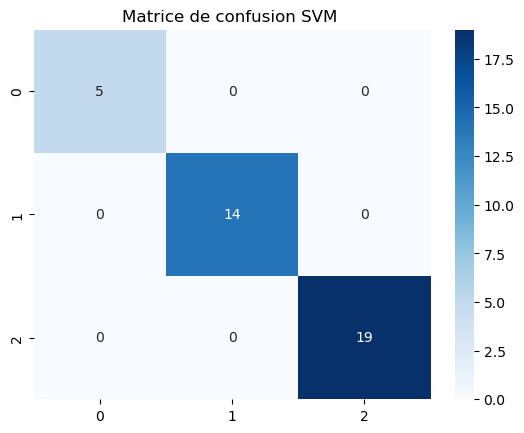

Matrice de confusion KNN :
[[ 5  0  0]
 [ 0 14  0]
 [ 0  2 17]]


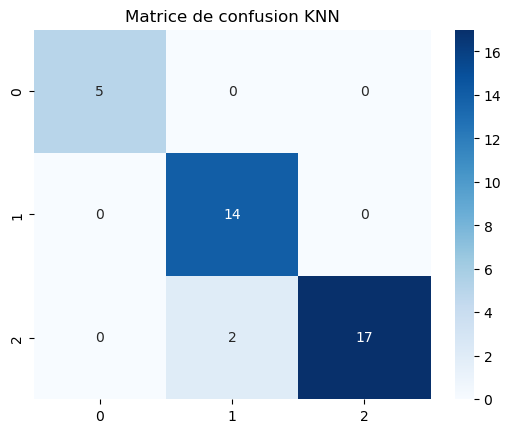

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

# Matrice de confusion SVM (apprentissage traditionnel)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
print("Matrice de confusion SVM :")
print(svm_conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de confusion SVM 
sns.heatmap(svm_conf_matrix, annot=True, cmap="Blues")
plt.title("Matrice de confusion SVM ")
plt.show()

# Matrice de confusion KNN 
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
print("Matrice de confusion KNN :")
print(knn_conf_matrix)
# Matrice de confusion KNN 
sns.heatmap(knn_conf_matrix, annot=True, cmap="Blues")
plt.title("Matrice de confusion KNN")
plt.show()

In [ ]:
On observe que SVM donne des Résultat mieux que KNN

## 3- Evaluer la performance de SVM et KNN, en utilisant les métriques : Rappel, Précision, F-score, et Taux d’erreur.

#### KNN

In [70]:
print(classification_report(y_test, knn_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.88      1.00      0.93        14
           2       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38



In [83]:
recall_KNN_Trad=recall_score(y_test, knn_model.predict(x_test), average='macro')
precision_KNN_Trad=precision_score(y_test, knn_model.predict(x_test), average='macro')
f1_KNN_Trad=f1_score(y_test, knn_model.predict(x_test), average='macro')
erreur_KNN_trad=1-accuracy_score(y_test, knn_model.predict(x_test))
print("Le f-score:",f1_KNN_Trad)
print("Le rappel:",recall_KNN_Trad)
print("La precison:",precision_KNN_Trad)
print("accurancy:",accuracy_score(y_test, knn_model.predict(x_test)))

Le f-score: 0.9555555555555556
Le rappel: 0.9555555555555556
La precison: 0.9555555555555556
accurancy: 0.9473684210526315


#### SVM

In [73]:
print(classification_report(y_test, svm_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        19

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [84]:
recall_SVM_Trad=recall_score(y_test, svm_model.predict(x_test), average='macro')
precision_SVM_Trad=precision_score(y_test, svm_model.predict(x_test), average='macro')
f1_SVM_Trad=f1_score(y_test,svm_model.predict(x_test), average='macro')
erreur_SVM_Trad=1-accuracy_score(y_test, svm_model.predict(x_test))
print("Le f-score:",f1_SVM_Trad)
print("Le rappel:",recall_SVM_Trad)
print("La precison:",precision_SVM_Trad)
print("accurancy:",accuracy_score(y_test, svm_model.predict(x_test)))

Le f-score: 1.0
Le rappel: 1.0
La precison: 1.0
accurancy: 1.0


## 4- Etudiez l’influence du paramètre k sur la performance de KNN.

k = 1, Taux_de_réussite = 0.95
k = 2, Taux_de_réussite = 0.92
k = 3, Taux_de_réussite = 0.95
k = 4, Taux_de_réussite = 0.95
k = 5, Taux_de_réussite = 0.97
k = 6, Taux_de_réussite = 0.95
k = 7, Taux_de_réussite = 0.97
k = 8, Taux_de_réussite = 0.95
k = 9, Taux_de_réussite = 0.97
k = 10, Taux_de_réussite = 0.95
k = 11, Taux_de_réussite = 0.95
k = 12, Taux_de_réussite = 0.95
k = 13, Taux_de_réussite = 0.95
k = 14, Taux_de_réussite = 0.95
k = 15, Taux_de_réussite = 0.95
k = 16, Taux_de_réussite = 0.95
k = 17, Taux_de_réussite = 0.95
k = 18, Taux_de_réussite = 0.95
k = 19, Taux_de_réussite = 0.97


Text(0, 0.5, 'testing accuracy')

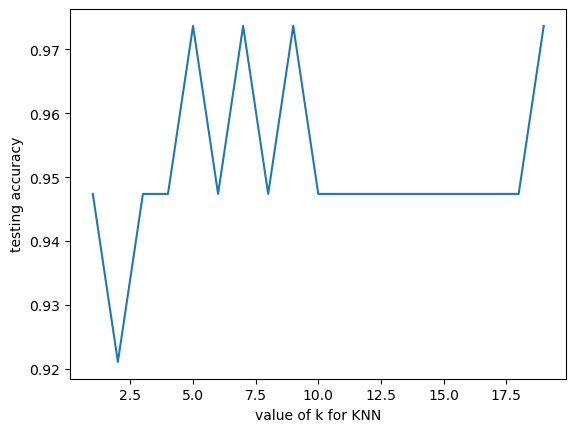

In [66]:

# Valeurs de k à tester
k_values = range(1, 20)

# Liste pour stocker les scores de chaque modèle
scores = []

# Boucle sur les valeurs de k
for k in k_values:
    # Entraînement du modèle avec la valeur de k courante
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = knn.predict(x_test)

    # Calcul du score de précision et ajout à la liste
    Taux_de_réussite = accuracy_score(y_test, y_pred)
    scores.append(Taux_de_réussite)

# Affichage des scores pour chaque valeur de k
for k, score in zip(k_values, scores):
    print(f"k = {k}, Taux_de_réussite = {score:.2f}")


plt.plot(k_values,scores)
plt.xlabel("value of k for KNN")
plt.ylabel("testing accuracy")


## Comparer la performance de SVM et KNN, et donner une interprétation des résultats obtenus.

In [87]:
import pandas as pd
evaluation = {
"KNN-traditionnel":{"recall":recall_KNN_Trad,"precision":precision_KNN_Trad,"F1-score":f1_KNN_Trad  , "Erreur": 1 - f1_KNN_Trad   },
"knn-validation_croise":{"recall":recall_knn_val,"precision":precision_knn_val,"F1-score":f1_knn_val , "Erreur": 1 - f1_knn_val},
"SVM-traditionnel":{"recall":recall_SVM_Trad,"precision":precision_SVM_Trad,"F1-score":f1_SVM_Trad  , "Erreur": 1 - f1_SVM_Trad },
"SVM-validation_croise":{"recall":recall_SVM_val,"precision":precision_SVM_val,"F1-score":f1_SVM_val , "Erreur": 1 -f1_SVM_val }
}

pd.DataFrame.from_dict(evaluation)

,KNN-traditionnel,knn-validation_croise,SVM-traditionnel,SVM-validation_croise
recall,0.955556,0.822222,1.0,0.972619
precision,0.955556,0.835741,1.0,0.971429
F1-score,0.955556,0.793036,1.0,0.969915
Erreur,0.044444,0.206964,0.0,0.030085
